### Raw NN
[https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [26]:
from exit import NeuralNetwork
from exit.layers import Dense
from exit.initializers import GlorotUniform, GlorotNormal
from exit.activations import Sigmoid, Relu
from exit.losses import CrossEntropy, L2
from exit.optimizers import Momentum, RMSProp, Adam

### Regression

In [53]:
nn = NeuralNetwork()
input = np.linspace(0,20,21).reshape(-1,1)
output = (input*2+10)
nn.sequence(
    input.shape[1],
    Dense(4, Relu),
    Dense(1),
)
for i in range(100):
    predict = nn.train(input, output, L2, learning_rate=0.00003)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])

loss 0 : 619.7601182477656
loss 99 : 13.474704783850733


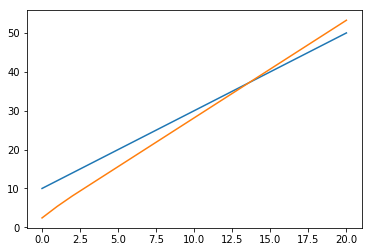

In [54]:
plt.plot(input, output)
plt.plot(input, nn.predict(input))

loss 0 : 19913744.884184882
loss 99 : 1131252.331537422
loss 198 : 938056.4046338204
loss 297 : 733457.5304756821
loss 396 : 532692.6595701112
loss 495 : 371984.55227918224
loss 594 : 262218.10793828237
loss 693 : 189192.6431209495
loss 792 : 136433.22822754586
loss 891 : 104245.82840544285
loss 990 : 83333.82985005672


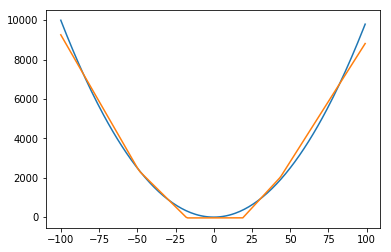

In [68]:
nn = NeuralNetwork(optimizer=Adam(), initializer=GlorotUniform())

input = np.arange(-100,100).reshape(-1, 1)
output = np.power(input, 2) - 5

nn.sequence(
    input.shape[1],
    Dense(6, Relu),
    Dense(1),
)
for i in range(1000):
    predict = nn.train(input, output, L2, learning_rate=0.1)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])

plt.plot(input, output)
plt.plot(input, nn.predict(input))

array([[-0.4337007 ,  0.53806641, -0.45153651, -0.54867187, -0.68008125,
         0.67408391]])

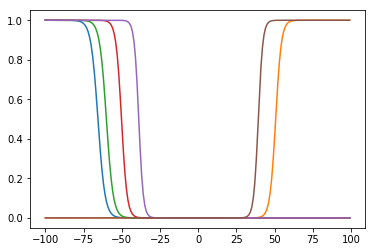

In [66]:
for i in range(6): 
    w = nn._network[0]._weights[0, i]
    b = nn._network[0]._bias[0, i]
    z = np.dot(input, w) + b
    a = nn._network[0]._activation_function.feed_forward(z)
    plt.plot(input, a)
nn._network[0]._weights

### Classifiaction

In [7]:
nn = NeuralNetwork()
input = np.linspace(0,20,100).reshape(-1,1)
output = (input*2+10 > 30).astype(int)
nn.sequence(
    input.shape[1],
    Dense(1, Sigmoid),
)
for i in range(1000):
    predict = nn.train(input, output, CrossEntropy, learning_rate=0.01)
    if i%99 is 0:
        print(f'loss: {i} = ', predict['loss'])

loss: 0 =  0.40636682512204403
loss: 99 =  0.19197732190221348
loss: 198 =  0.3218117059179331
loss: 297 =  0.2633756993573162
loss: 396 =  0.4377871886673483
loss: 495 =  0.15319537257581284
loss: 594 =  0.16645372533597935
loss: 693 =  0.0813923752621456
loss: 792 =  0.06700466174589677
loss: 891 =  0.043086306177697466
loss: 990 =  0.03472644149858683


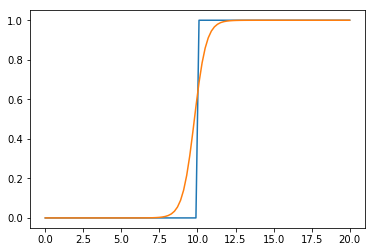

In [8]:
plt.plot(input, output)
plt.plot(input, nn.predict(input))

In [9]:
x = np.random.randn(100000)*2 + 10
mean = np.mean(x)
sd = np.sqrt(np.sum( np.square(x-mean) ) / (x.shape[0]-1)  )
sd, mean

(2.001299760573178, 9.994964414615657)

In [10]:
import math
x = np.linspace(-5, 5, 200)

def normal_distribution(mu, sd):
    return 1/ np.sqrt(2*math.pi*np.square(sd)) * np.power(math.e, -np.square(x-mu)/ (2*np.square(sd)))

y = normal_distribution(0, 0.2)
# plt.plot(x, y1)



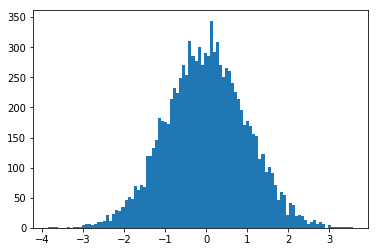

In [11]:
y = np.random.randn(10000)
x = np.linspace(0,999, 10000)
h = plt.hist(y, 100)

In [161]:
np.sum(np.array([np.sum(np.random.uniform(0,1, 100) > 0.5) % 2 == 1 for i in range(10000)]))

5024